In [1]:
#  importações para tratamentos de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Imports para ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('infopreco.csv', sep=';', encoding='latin1')

In [4]:
df.head()

,CNPJ,NOME,ENDEREÇO,COMPLEMENTO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,300357000195,POSTO E TRANSPORTADORA PEGORARO,"RODOVIA BR 163,S/N",KM 786,ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,59",05/07/2018 18:55


In [5]:
# visualizando os tipos de classes que temos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
CNPJ             599 non-null int64
NOME             599 non-null object
ENDEREÇO         599 non-null object
COMPLEMENTO      177 non-null object
BAIRRO           595 non-null object
MUNICÍPIO        599 non-null object
UF               599 non-null object
PRODUTO          599 non-null object
VALOR VENDA      599 non-null object
DATA CADASTRO    599 non-null object
dtypes: int64(1), object(9)
memory usage: 46.9+ KB


In [6]:
# convetendo o 'VALOR VENDA'
df['VALOR VENDA'] = df['VALOR VENDA'].apply(lambda x : str(x).replace(',','.')).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
CNPJ             599 non-null int64
NOME             599 non-null object
ENDEREÇO         599 non-null object
COMPLEMENTO      177 non-null object
BAIRRO           595 non-null object
MUNICÍPIO        599 non-null object
UF               599 non-null object
PRODUTO          599 non-null object
VALOR VENDA      599 non-null float64
DATA CADASTRO    599 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 46.9+ KB


In [7]:
# plot de calor adaptado para verificar dados faltantes
def grafico_dados_faltantes(_df):
    plt.figure(figsize=(15,5))
    return sns.heatmap(_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

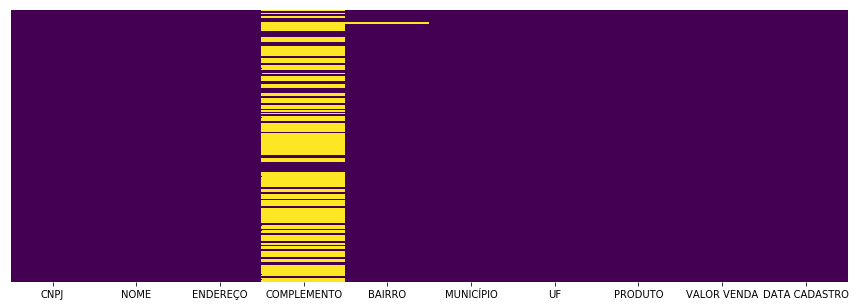

In [8]:
# gerar gráfico para verificar dados faltantes
grafico_dados_faltantes(df);

#### Como podemos observar no gráfico acima, a coluna COMPLEMENTO está com  muitos dados faltantes acredito que não seja uma coluna relevante para nós. Vamos exclui-la.

In [9]:
df.drop(['COMPLEMENTO'], axis=1, inplace=True)
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'BAIRRO', 'MUNICÍPIO', 'UF', 'PRODUTO',
       'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

#### Agora vamos dar uma olhada na coluna BAIRRO os valores que estiverem Nan e vamos preencher com "Bairro não cadastrado"

In [10]:
df['BAIRRO'].fillna(('Bairro não cadastrado'), inplace=True)

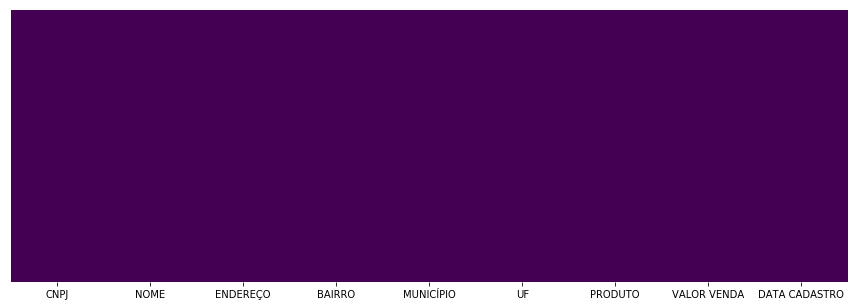

In [11]:
grafico_dados_faltantes(df);

#### Agora que o conjunto de dados original está tudo ok, vamos partir para predição 
#### Temos muitas variaveis descritivas vamos ter que testar algumas variaveis e converter em dummy

In [12]:
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'BAIRRO', 'MUNICÍPIO', 'UF', 'PRODUTO',
       'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

In [13]:
df['MUNICÍPIO'].unique()

array(['TRES LAGOAS', 'COXIM', 'SAO LUIS', "MACHADINHO D'OESTE",
       'CAMPO GRANDE', 'BRASILIA', 'CAMPINAS', 'CRISTALINA',
       'PIRES DO RIO', 'SAO JOSE DOS PINHAIS', 'CATAGUASES', 'TERESINA',
       'PINHEIRO MACHADO', 'RIBAS DO RIO PARDO', 'BELO JARDIM', 'ARACUAI',
       'VIAMAO', 'ITAJAI', 'FIGUEIROPOLIS', 'FORMOSA', 'PORANGATU',
       'LEME', 'ANDRADAS', 'GUARAI', 'ALTO ALEGRE DOS PARECIS', 'CHAPECO',
       'SERTANOPOLIS', 'SANTO ANTONIO DE PADUA', 'JARU',
       'SAO MIGUEL DO GUAPORE', 'NOVA ANDRADINA', 'DUQUE DE CAXIAS',
       'ITABORAI', 'CACERES', 'BELEM', 'BURITIS', 'RIO DE JANEIRO',
       'POUSO ALEGRE', 'CORUMBA', 'MUNDO NOVO', 'PORTO VELHO', 'MACAE',
       'PALMAS', 'TUCURUI', 'BOM PRINCIPIO', 'VILA BOA', 'GUARATINGUETA',
       'TRAIRAO', 'BALSA NOVA', 'QUEIMADOS', 'MIRANDA', 'CURITIBA',
       'CASCAVEL', 'PONTALINA', 'ARIQUEMES', 'ROLIM DE MOURA', 'MINEIROS',
       'MACAIBA', 'CACHOEIRINHA', 'ARAGUAINA', 'OURO PRETO DO OESTE',
       'CICERO DANTAS', 'ITAPO

In [14]:
campos = ['PRODUTO']
df.groupby(campos)[campos].count()

,PRODUTO
PRODUTO,
Diesel S10,159
Diesel S500,121
Etanol,131
GNV,13
Gasolina C Comum,175


In [15]:
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'BAIRRO', 'MUNICÍPIO', 'UF', 'PRODUTO',
       'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

In [16]:
# depois de realizar alguns testes, percebi que o rmse sobe muito com outras variáves
# selecionei somente estás 3 variáveis 
df2 = df[['UF','PRODUTO', 'VALOR VENDA']]
df2.head()

,UF,PRODUTO,VALOR VENDA
0,MS,Gasolina C Comum,4.436
1,MS,Etanol,3.482
2,MS,Diesel S500,3.644
3,MS,Diesel S10,3.734
4,MS,Gasolina C Comum,4.590


In [17]:
df_dummy=pd.get_dummies(df2,columns=['UF','PRODUTO'], drop_first=True)
df_dummy.head()

,VALOR VENDA,UF_CE,UF_DF,UF_GO,UF_MA,UF_MG,UF_MS,UF_MT,UF_PA,UF_PB,...,UF_RO,UF_RS,UF_SC,UF_SE,UF_SP,UF_TO,PRODUTO_Diesel S500,PRODUTO_Etanol,PRODUTO_GNV,PRODUTO_Gasolina C Comum
0,4.436,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.482,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.644,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.734,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.590,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
x = df_dummy.drop('VALOR VENDA', axis=1)
y = df_dummy['VALOR VENDA']

### Separando dados de treino e test

In [19]:
x_train, x_test, y_train, y_teste = train_test_split(x,y, test_size=0.33)

## Modelo 1 - Regressão Linear

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm.intercept_

4.022684003791123

In [23]:
coeff = pd.DataFrame(lm.coef_,x.columns, columns=['Coeficiente'])
coeff

,Coeficiente
UF_CE,-0.136452
UF_DF,-0.489887
UF_GO,-0.258683
UF_MA,-0.411403
UF_MG,-0.116973
UF_MS,-0.387141
UF_MT,-0.193718
UF_PA,-0.207383
UF_PB,-0.223684
UF_PE,-0.265654


In [24]:
predicao = lm.predict(x_test)

In [41]:
# O RMSE com estas colunas foi baixo
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste,predicao)))

RMSE: 0.30021506554542426


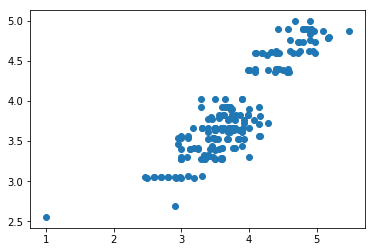

In [26]:
plt.scatter(y_teste, predicao);

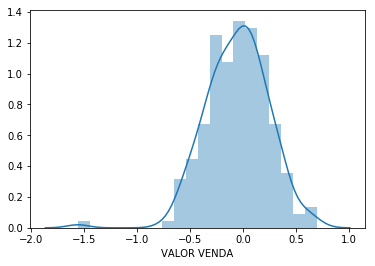

In [27]:
residuos = y_teste - predicao
sns.distplot(residuos, bins=20);

## Modelo 2 - Random Florest 

In [28]:
# predição randonflorest
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor(n_estimators=1000)

In [32]:
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
predict_forest = forest.predict(x_test)
predict.

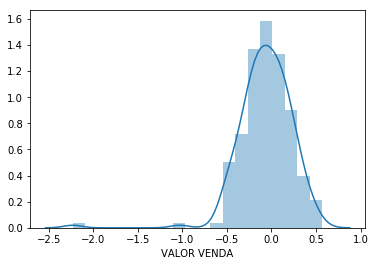

In [42]:
residuos2 = y_teste - predict_forest
sns.distplot(residuos2, bins=20);

In [37]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste,predict_forest)))

RMSE: 0.30276005687694246


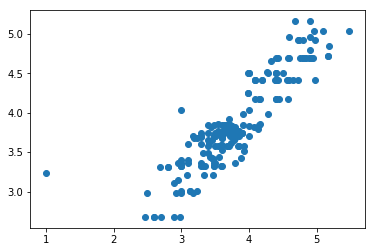

In [44]:
plt.scatter(y_teste, predict_forest);

## Houve um empate técnico entre os modelos já que a diferença do RMSE ficou nas casas decimais, com isso não dá para dizer qual o melhor modelo para esse caso.